<a href="https://colab.research.google.com/github/yingchenjin/IANAL/blob/main/simplify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1. Load your original CSV
df = pd.read_csv("data-ianal.csv")

# 2. Filter out rows where post_type is "question"
df_answers_only = df[df["post_type"] == "answer"].copy()

# 3. Write the resulting DataFrame to a new CSV
#    This CSV will keep the original columns but contain only answer rows.
df_answers_only.to_csv("answers_only.csv", index=False)

print("Filtered CSV created with only 'answer' rows!")


Filtered CSV created with only 'answer' rows!


In [ ]:
!pip install transformers torch


In [ ]:
import pandas as pd
from transformers import pipeline


In [ ]:
df = pd.read_csv("answers_only.csv")


In [ ]:
!nvidia-smi


Tue Mar  4 07:19:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             52W /  400W |    2401MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
#summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", device=0)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


In [ ]:
%env CUDA_LAUNCH_BLOCKING=1


env: CUDA_LAUNCH_BLOCKING=1


In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove non-printable / control chars:
    text = "".join(ch for ch in text if ch.isprintable())
    return text

df["question_body"] = df["question_body"].apply(clean_text)
df["answer_body"]   = df["answer_body"].apply(clean_text)


In [ ]:
summarizer = pipeline(
    "summarization",
    model="facebook/bart-large-cnn",
    device=-1  # forces CPU usage
)


Device set to use cpu


In [ ]:
def summarize_text(text, max_len=60):
    """
    Summarize the given text using the summarizer pipeline.
    Adjust the max_length and min_length as needed.
    """
    # You can tweak these hyperparameters
    result = summarizer(text, max_length=max_len, min_length=10, do_sample=False)
    return result[0]["summary_text"]

# Apply the summarization to the 'body' column

df["question_summary"] = df["question_body"].apply(summarize_text)

# Summarize the answer text
df["answer_summary"] = df["answer_body"].apply(summarize_text)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Your max_length is set to 60, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)
Your max_length is set to 60, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)
Your max_length is set to 60, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 60, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typica

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
!pip install --upgrade transformers datasets torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0
    Uninstalling torch-2.6.0:
      Successfully uninstalled torch-2.6.0


In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import pipeline
import torch


In [ ]:
summarizer = pipeline(
    "summarization",
    model="sshleifer/distilbart-cnn-12-6",
    device=0  # 0 for GPU; -1 for CPU
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# 1. Load the CSV
df = pd.read_csv("data-ianal.csv")

# (Optional) Check the first few rows/columns
print(df.head())
print(df.columns)


  post_type  post_id  creation_date  question_id  \
0  question   221365     1387031069       221365   
1  question   225132     1390436378       225132   
2    answer   225157     1390464399       225132   
3  question   186127     1360167268       186127   
4  question   179054     1355243582       179054   

                                      question_title  \
0  Mozilla Public License (MPL 2.0) vs Lesser GNU...   
1  When using the Apache license, is there still ...   
2  When using the Apache license, is there still ...   
3                         Anonymous software license   
4  Does some code inherit GNU GPL if it just link...   

                                       question_body  \
0  <p>I would like to release a software library ...   
1  <p>I can certainly see the need for CLAs with ...   
2  <p>I can certainly see the need for CLAs with ...   
3  <p>I am aware of some of the problems of the c...   
4  <p>Suppose there is a library <code>xxx</code>...   

             

In [ ]:
def chunk_text(text, chunk_size=512):
    """
    Splits a string into a list of smaller strings of up to `chunk_size` characters.
    """
    if not isinstance(text, str) or not text.strip():
        return []
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]


In [ ]:
def batch_chunk_summarize(batch, chunk_size=512, max_len=60):
    """
    Summarizes both 'question_body' and 'answer_body' in a single pass.
    Assumes 'batch' is a dict with lists of question_body and answer_body.
    Returns new lists: question_summary, answer_summary.
    """
    q_summaries = []
    a_summaries = []

    for qtext, atext in zip(batch["question_body"], batch["answer_body"]):

        # 1) Chunk the question
        q_chunks = chunk_text(qtext, chunk_size=chunk_size)
        q_partials = []
        for chunk in q_chunks:
            out = summarizer(chunk, max_length=max_len, min_length=10, do_sample=False)
            q_partials.append(out[0]["summary_text"])

        # Re-summarize partial Q summaries if there's more than one
        if len(q_partials) > 1:
            combined_q = " ".join(q_partials)
            out = summarizer(combined_q, max_length=max_len, min_length=10, do_sample=False)
            final_q = out[0]["summary_text"]
        elif q_partials:
            final_q = q_partials[0]
        else:
            final_q = ""

        # 2) Chunk the answer
        a_chunks = chunk_text(atext, chunk_size=chunk_size)
        a_partials = []
        for chunk in a_chunks:
            out = summarizer(chunk, max_length=max_len, min_length=10, do_sample=False)
            a_partials.append(out[0]["summary_text"])

        # Re-summarize partial A summaries if there's more than one
        if len(a_partials) > 1:
            combined_a = " ".join(a_partials)
            out = summarizer(combined_a, max_length=max_len, min_length=10, do_sample=False)
            final_a = out[0]["summary_text"]
        elif a_partials:
            final_a = a_partials[0]
        else:
            final_a = ""

        # Add results to our lists
        q_summaries.append(final_q)
        a_summaries.append(final_a)

    return {"question_summary": q_summaries, "answer_summary": a_summaries}


In [ ]:
dataset = Dataset.from_pandas(df)  # automatically detects columns
dataset


Dataset({
    features: ['post_type', 'post_id', 'creation_date', 'question_id', 'question_title', 'question_body', 'answer_body', 'Category'],
    num_rows: 276
})

In [ ]:
summarized_dataset = dataset.map(
    batch_chunk_summarize,
    batched=True,
    batch_size=4,  # adjust for your GPU memory
    fn_kwargs={"chunk_size": 512, "max_len": 60}
)


Map:   0%|          | 0/276 [00:00<?, ? examples/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Your max_length is set to 60, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 60, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 60, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 60, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically 

In [ ]:
print(summarized_dataset[0])
# e.g., {'question_body': "...", 'answer_body': "...", 'question_summary': "...", 'answer_summary': "...", ...}


{'post_type': 'question', 'post_id': 221365, 'creation_date': 1387031069, 'question_id': 221365, 'question_title': 'Mozilla Public License (MPL 2.0) vs Lesser GNU General Public License (LGPL 3.0)', 'question_body': '<p>I would like to release a software library written in a <strong>class-based, object-oriented programming language</strong> (Java) on a <strong>web-based source code hosting service</strong>, that allows forks of the project to be <strong>merged into the main project</strong> (GitHub via pull requests).  I have researched on the web and given a lot of thought on how to license the software. \nAm I correct in the following assumptions (from an <a href="http://en.wikipedia.org/wiki/IANAL" rel="noreferrer">IANAL</a> perspective)?</p>\n\n<ul>\n<li><p>Both LGPL and MPL <strong>promote sharing of modifications</strong> to the LGPL/MPL licensed software being used inside other software projects. Instead of requiring the users of the modified library to <strong>host a seperate f

In [ ]:
df_summarized = summarized_dataset.to_pandas()
df_summarized[["question_body", "answer_body", "question_summary", "answer_summary"]].head(5)


,question_body,answer_body,question_summary,answer_summary
0,<p>I would like to release a software library ...,None,I would like to release a software library wr...,
1,<p>I can certainly see the need for CLAs with ...,None,Apache seems to already have that type of ver...,
2,<p>I can certainly see the need for CLAs with ...,<p>IANAL but my understanding is that a CLA en...,Apache seems to already have that type of ver...,CLA ensures that contributors have the rights...
3,<p>I am aware of some of the problems of the c...,None,Some moral rights are inalienable due to (cer...,
4,<p>Suppose there is a library <code>xxx</code>...,None,There is a library that provides a function <...,


In [ ]:
df_summarized.to_csv("data-ianal_summarized.csv", index=False)


In [ ]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 14.8 MB/s eta 0:00:00


In [ ]:
import PyPDF2

license_texts = {}

pdf_files = [
    "Apache License, Version 2.0 – Open Source Initiative.pdf",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf",
    "GNU General Public License version 2 – Open Source Initiative.pdf",
    "GNU General Public License version 3 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf",
    "The MIT License – Open Source Initiative.pdf",
    "The Nethack General Public License – Open Source Initiative.pdf"
]

for pdf_file in pdf_files:
    with open(f"{pdf_file}", "rb") as f:
        reader = PyPDF2.PdfReader(f)
        text_content = []
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text_content.append(page_text)
        # Join all pages into a single string
        joined_text = "\n".join(text_content)
        # Store it in a dictionary keyed by filename or short name
        license_texts[pdf_file] = joined_text

# Now license_texts is a dict: { filename: full_license_string, ... }
print(license_texts.keys())


dict_keys(['Apache License, Version 2.0 – Open Source Initiative.pdf', 'Apache Software License, version 1.1 – Open Source Initiative.pdf', 'GNU Affero General Public License version 3 – Open Source Initiative.pdf', 'GNU General Public License version 2 – Open Source Initiative.pdf', 'GNU General Public License version 3 – Open Source Initiative.pdf', 'GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf', 'GNU Lesser General Public License version 3 – Open Source Initiative.pdf', 'GNU Library General Public License version 2 – Open Source Initiative.pdf', 'The MIT License – Open Source Initiative.pdf', 'The Nethack General Public License – Open Source Initiative.pdf'])


In [ ]:
# Suppose you already have `license_texts` like this:
# license_texts = {
#     "Apache License, Version 2.0 – Open Source Initiative.pdf": "...",
#     "Apache Software License, version 1.1 – Open Source Initiative.pdf": "...",
#     "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "...",
#     ...
#     "The MIT License – Open Source Initiative.pdf": "...",
#     "The Nethack General Public License – Open Source Initiative.pdf": "..."
# }

# 1. Define a mapping from long filenames to short license keys:
mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}

# 2. Create a new dictionary keyed by the short license names:
license_map = {}
for long_filename, short_key in mapping.items():
    # Access the text from the old dictionary, license_texts
    license_map[short_key] = license_texts[long_filename]

# 3. Now `license_map` is keyed by short license names instead of the big PDF filenames.
print(license_map.keys())
# e.g. dict_keys(['Apache-2.0', 'Apache-1.1', 'AGPL-3.0', 'GPL-2.0', 'GPL-3.0', 'LGPL-2.1', 'LGPL-3.0', 'LGPL-2.0', 'MIT', 'Nethack'])

# 4. You can now reference, for instance, the full Apache 2.0 text with:
apache2_text = license_map["Apache-2.0"]
print(apache2_text[:500])  # Print first 500 characters, for example


dict_keys(['Apache-2.0', 'Apache-1.1', 'AGPL-3.0', 'GPL-2.0', 'GPL-3.0', 'LGPL-2.1', 'LGPL-3.0', 'LGPL-2.0', 'MIT', 'Nethack'])
TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
1. Definitions.POPULAR / STRONG COMMUNITY
Apache License, Version 2.0
Version 2.0 Submitted: February 8, 2004 Submitter: Kevin Coar
SPDX short identifier: Apache-2.0
Steward:Apache Software Foundation
Link to license steward's versionAbout
Open Source Definition
Licenses
Open Source AI
Blog
Programs
MENU2/25/25, 2:01 AM Apache License, Version 2.0 – Open Source Initiative
https://opensource.org/license/apache-2-0 1/9
“License” shall me


In [ ]:
df_summarized["answer_summary"]


,answer_summary
0,
1,
2,CLA ensures that contributors have the rights...
3,
4,
...,...
271,"If you didn't copy any code or screenshots, y..."
272,"Open source does not necessarily mean free, b..."
273,A single LGPL class makes the entire image in...
274,You probably have a legal obligation to point...


In [ ]:
from sentence_transformers import SentenceTransformer, util

# 1. Load (or reuse) a sentence-transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

def compare_to_license(text, license_text):
    """
    Returns a similarity score between the text and the license text.
    Higher score => more semantic overlap.
    """
    if not isinstance(text, str) or not text.strip():
        # If the text is empty or not a string, similarity is 0
        return 0.0

    # 2. Encode both the text and the license text
    text_emb = model.encode(text, convert_to_tensor=True)
    license_emb = model.encode(license_text, convert_to_tensor=True)

    # 3. Compute the cosine similarity
    similarity = util.cos_sim(text_emb, license_emb)

    # 'similarity' is a 2D tensor of shape [1,1], so extract float
    return float(similarity[0][0])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
mit_text = license_map["MIT"]  # The string you extracted

# Compare with your existing similarity or LLM-based approach
similarity = compare_to_license(df_summarized["answer_summary"][0], mit_text)


In [ ]:
df_summarized["similarity_mit"] = df_summarized["answer_summary"].apply(
    lambda txt: compare_to_license(txt, mit_text)
)


In [ ]:
licenses = ["MIT", "Apache-2.0", "GPL-3.0"]  # your short keys
for lic in licenses:
    license_text = license_map[lic]
    col_name = f"similarity_{lic}"
    df_summarized[col_name] = df_summarized["answer_summary"].apply(
        lambda txt: compare_to_license(txt, license_text)
    )


=== Summary Stats ===
Max similarity overall: 0.6928311586380005
Min similarity overall: 0.0
Rows with high similarity: 0
Rows with low similarity: 55
Top 5 answers with highest license similarity:
                                        answer_summary  license_max_sim  \
251   MIT licence grants "without limitation the ri...         0.692831   
41    MIT license states: "The above copyright noti...         0.683167   
233   The terms of the software are the terms of  t...         0.679916   
269   US copyright law allows all copies necessary ...         0.629523   
272   Open source does not necessarily mean free, b...         0.615841   

    best_license  
251          MIT  
41           MIT  
233      GPL-3.0  
269          MIT  
272      GPL-2.0  
Row 251: best license=MIT, contradiction check=No conflict
Row 41: best license=MIT, contradiction check=No conflict
Row 233: best license=GPL-3.0, contradiction check=No conflict
Row 269: best license=MIT, contradiction check=No conflic

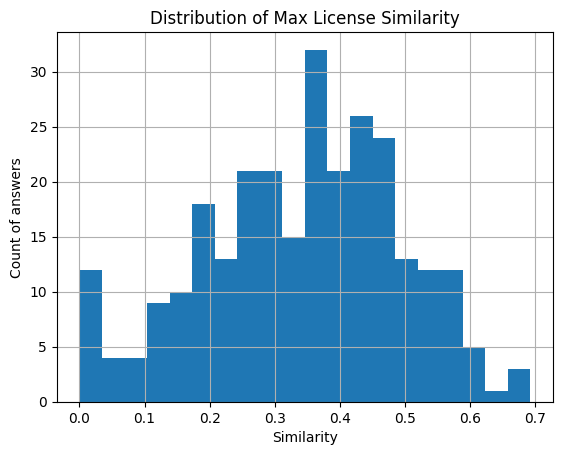

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Suppose you have:
# 1) df_summarized (DataFrame) with a column "answer_summary"
# 2) a license_map dict of short license name -> license text
#    e.g. license_map = {"MIT": "MIT license text ...", "Apache-2.0": "...", etc.}

# Step 1: Load or reuse your model (once)
model = SentenceTransformer("all-MiniLM-L6-v2")

def compare_to_license(text, license_text):
    """Return a float similarity between text and license_text."""
    if not isinstance(text, str) or not text.strip():
        return 0.0
    txt_emb = model.encode(text, convert_to_tensor=True)
    lic_emb = model.encode(license_text, convert_to_tensor=True)
    similarity = util.cos_sim(txt_emb, lic_emb)
    return float(similarity[0][0])

# Let's assume you have some set of license keys in your license_map:
licenses = ["MIT", "Apache-2.0", "GPL-2.0", "GPL-3.0"]  # example

# Step 2: For each license, compute similarity for each row
for lic in licenses:
    license_text = license_map[lic]
    col_name = f"similarity_{lic}"
    df_summarized[col_name] = df_summarized["answer_summary"].apply(
        lambda x: compare_to_license(x, license_text)
    )

# Step 3: Interpretation / Thresholding
# Example thresholds:
HIGH_THRESHOLD = 0.7
LOW_THRESHOLD  = 0.2

# We can create flags for each row, e.g. "high similarity" or "low similarity"
df_summarized["license_max_sim"] = df_summarized[[f"similarity_{l}" for l in licenses]].max(axis=1)
df_summarized["license_min_sim"] = df_summarized[[f"similarity_{l}" for l in licenses]].min(axis=1)

# We'll mark as "high" if the maximum sim is above 0.7
df_summarized["high_sim_flag"] = df_summarized["license_max_sim"] > HIGH_THRESHOLD
df_summarized["low_sim_flag"]  = df_summarized["license_max_sim"] < LOW_THRESHOLD

# Step 4: Combine with other checks
# For instance, a placeholder function to do a contradiction check with an LLM.
# This is just a demonstration stub.
def check_contradiction(summary, license_text):
    # You might prompt an LLM here:
    # "Does the summary conflict with or contradict the license? Answer yes or no."
    # We'll just return "No conflict" for demonstration.
    return "No conflict"

# Example usage: pick the license with the highest similarity, do a contradiction check
def best_license(row):
    # find which license has the highest similarity in that row
    row_sim = row[[f"similarity_{l}" for l in licenses]]
    best_lic = row_sim.idxmax()
    # idxmax might return "similarity_MIT", so let's parse out "MIT"
    return best_lic.replace("similarity_", "")

df_summarized["best_license"] = df_summarized.apply(best_license, axis=1)

# Step 5: Summarize & Visualize
# Example summary stats
print("=== Summary Stats ===")
print("Max similarity overall:", df_summarized["license_max_sim"].max())
print("Min similarity overall:", df_summarized["license_max_sim"].min())
print("Rows with high similarity:", df_summarized["high_sim_flag"].sum())
print("Rows with low similarity:", df_summarized["low_sim_flag"].sum())

# Sort by highest max similarity
df_sorted = df_summarized.sort_values(by="license_max_sim", ascending=False)
print("Top 5 answers with highest license similarity:")
print(df_sorted[["answer_summary", "license_max_sim", "best_license"]].head(5))

# Inspect a handful of highest or lowest similarity answers
# For example, contradiction check:
for i in df_sorted.head(5).index:
    row = df_sorted.loc[i]
    chosen_license = row["best_license"]
    # run a hypothetical contradiction check
    result = check_contradiction(row["answer_summary"], license_map[chosen_license])
    print(f"Row {i}: best license={chosen_license}, contradiction check={result}")

# Step 6: (Optional) Visual
# For instance, a simple histogram of the max similarity
import matplotlib.pyplot as plt

df_summarized["license_max_sim"].hist(bins=20)
plt.title("Distribution of Max License Similarity")
plt.xlabel("Similarity")
plt.ylabel("Count of answers")
plt.show()

# That’s it! You now have a script that:
# 1) calculates similarity to multiple licenses,
# 2) interprets results with threshold flags,
# 3) optionally does an LLM contradiction check,
# 4) shows basic summary stats and a histogram visualization.


**ZERO SHOT**

In [ ]:
!pip install pandas PyPDF2 transformers torch


In [ ]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0
    Uninstalling torch-2.6.0:
      Successfully uninstalled torch-2.6.0


In [ ]:
import pandas as pd
import PyPDF2
from transformers import pipeline
import os


In [ ]:
df = pd.read_csv("data-ianal.csv")
print(df.head())


  post_type  post_id  creation_date  question_id  \
0  question   221365     1387031069       221365   
1  question   225132     1390436378       225132   
2    answer   225157     1390464399       225132   
3  question   186127     1360167268       186127   
4  question   179054     1355243582       179054   

                                      question_title  \
0  Mozilla Public License (MPL 2.0) vs Lesser GNU...   
1  When using the Apache license, is there still ...   
2  When using the Apache license, is there still ...   
3                         Anonymous software license   
4  Does some code inherit GNU GPL if it just link...   

                                       question_body  \
0  <p>I would like to release a software library ...   
1  <p>I can certainly see the need for CLAs with ...   
2  <p>I can certainly see the need for CLAs with ...   
3  <p>I am aware of some of the problems of the c...   
4  <p>Suppose there is a library <code>xxx</code>...   

             

In [ ]:
pdf_files = [
    "Apache License, Version 2.0 – Open Source Initiative.pdf",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf",
    "GNU General Public License version 2 – Open Source Initiative.pdf",
    "GNU General Public License version 3 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf",
    "The MIT License – Open Source Initiative.pdf",
    "The Nethack General Public License – Open Source Initiative.pdf"
]

license_texts = {}

for pdf_name in pdf_files:
    pdf_path = f"{pdf_name}"
    if os.path.exists(pdf_path):
        with open(pdf_path, "rb") as f:
            reader = PyPDF2.PdfReader(f)
            pages_text = []
            for page in reader.pages:
                text = page.extract_text()
                if text:
                    pages_text.append(text)
            full_text = "\n".join(pages_text)
            license_texts[pdf_name] = full_text
    else:
        print(f"File not found: {pdf_name}")

print("Extracted text for these PDFs:", license_texts.keys())


Extracted text for these PDFs: dict_keys(['Apache License, Version 2.0 – Open Source Initiative.pdf', 'Apache Software License, version 1.1 – Open Source Initiative.pdf', 'GNU Affero General Public License version 3 – Open Source Initiative.pdf', 'GNU General Public License version 2 – Open Source Initiative.pdf', 'GNU General Public License version 3 – Open Source Initiative.pdf', 'GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf', 'GNU Lesser General Public License version 3 – Open Source Initiative.pdf', 'GNU Library General Public License version 2 – Open Source Initiative.pdf', 'The MIT License – Open Source Initiative.pdf', 'The Nethack General Public License – Open Source Initiative.pdf'])


In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
candidate_labels = [
    "MIT",
    "GPL",
    "Apache",
    "AGPL",
    "LGPL",
    "Nethack",
    "No license reference"
]


In [ ]:
def zero_shot_classify(text, labels):
    if not isinstance(text, str) or not text.strip():
        return ("No license reference", 1.0)  # if empty, default to "No license reference"

    result = classifier(text, labels)
    # 'labels' are sorted from most likely to least
    top_label = result["labels"][0]
    top_score = result["scores"][0]
    return (top_label, top_score)


In [ ]:
df[["zero_shot_label", "zero_shot_score"]] = df["answer_body"].apply(
    lambda ans: pd.Series(zero_shot_classify(ans, candidate_labels))
)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
print(df[["answer_body", "zero_shot_label", "zero_shot_score"]])


                                           answer_body       zero_shot_label  \
0                                                  NaN  No license reference   
1                                                  NaN  No license reference   
2    <p>IANAL but my understanding is that a CLA en...                Apache   
3                                                  NaN  No license reference   
4                                                  NaN  No license reference   
..                                                 ...                   ...   
271  <p>From everything anyone (including lawyers) ...  No license reference   
272  <p>Open source does not necessarily mean free....                   GPL   
273  <p>GPL (and even LGPL) has <a href="http://lis...                  LGPL   
274  <p>I've never (in 20-odd years) come across in...                  AGPL   
275  <p>Personally, I'd just use a payment processo...                  LGPL   

     zero_shot_score  
0           1.00

In [ ]:
df.to_csv("data-ianal-zero-shot-labeled.csv", index=False)

In [ ]:
HIGH_CONF_THRESHOLD = 0.5
df["is_confident"] = df["zero_shot_score"] > HIGH_CONF_THRESHOLD


In [ ]:
print(df[["answer_body", "zero_shot_label", "zero_shot_score","is_confident"]])


                                           answer_body       zero_shot_label  \
0                                                  NaN  No license reference   
1                                                  NaN  No license reference   
2    <p>IANAL but my understanding is that a CLA en...                Apache   
3                                                  NaN  No license reference   
4                                                  NaN  No license reference   
..                                                 ...                   ...   
271  <p>From everything anyone (including lawyers) ...  No license reference   
272  <p>Open source does not necessarily mean free....                   GPL   
273  <p>GPL (and even LGPL) has <a href="http://lis...                  LGPL   
274  <p>I've never (in 20-odd years) come across in...                  AGPL   
275  <p>Personally, I'd just use a payment processo...                  LGPL   

     zero_shot_score  is_confident  
0 

layman terms

In [ ]:
!pip install --upgrade transformers accelerate einops bitsandbytes


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
model_name = "tiiuae/falcon-7b-instruct"


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_name = "tiiuae/falcon-7b-instruct"

# Load tokenizer & model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",  # let accelerate/bitsandbytes handle GPU usage
    trust_remote_code=True  # needed for some Falcon-based models
)

rewrite_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_length=1024,
    temperature=0.3,
    do_sample=False
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def chunk_text(text, chunk_size=1000):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start = end
    return chunks


In [ ]:
def rewrite_chunk_in_layman(chunk):
    prompt = f"""
Rewrite the following text in plain, conversational English, suitable for a non-technical audience.
Retain all key obligations, disclaimers, and important details:

{chunk}
"""
    output = rewrite_pipeline(prompt, max_new_tokens=400, num_return_sequences=1)
    # The pipeline returns a list of dicts with 'generated_text'
    rewritten = output[0]["generated_text"]
    # We might want to remove the original prompt from the output if the model echoes it
    # Some instruct models do "prompt + answer." We'll do a simple approach:
    # If the model includes the prompt, we can split or parse it out:
    if prompt in rewritten:
        rewritten = rewritten.split(prompt)[-1].strip()
    return rewritten.strip()


In [ ]:
def rewrite_license_in_layman(full_text, chunk_size=1000):
    chunks = chunk_text(full_text, chunk_size)
    layman_parts = []
    for c in chunks:
        layman_text = rewrite_chunk_in_layman(c)
        layman_parts.append(layman_text)
    # Combine all
    combined = "\n\n".join(layman_parts)
    return combined


In [ ]:
pdf_mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}


In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 17.3 MB/s eta 0:00:00


In [ ]:
import os
import PyPDF2

# Step A: Extract PDF text
def extract_pdf_text(pdf_path):
    pages_text = []
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            txt = page.extract_text()
            if txt:
                pages_text.append(txt)
    return "\n".join(pages_text)

pdf_mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}

license_texts = {}
for lic_key, pdf_file in pdf_mapping.items():
    path = f"{pdf_file}"
    if os.path.exists(path):
        license_texts[lic_key] = extract_pdf_text(path)
    else:
        license_texts[lic_key] = ""

# Step B: Load instruct model
model_name = "tiiuae/falcon-7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    trust_remote_code=True
)
rewrite_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_length=1024,
    temperature=0.3,
    do_sample=False
)

# Step C: Functions
def chunk_text(text, chunk_size=1000):
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

def rewrite_chunk_in_layman(chunk):
    prompt = f"""
Rewrite the following text in plain, conversational English, suitable for a non-technical audience.
Retain all key obligations, disclaimers, and important details:

{chunk}
"""
    output = rewrite_pipeline(prompt, max_new_tokens=400)
    rewritten = output[0]["generated_text"]
    # remove repeated prompt if it appears
    if prompt in rewritten:
        rewritten = rewritten.split(prompt)[-1].strip()
    return rewritten.strip()

def rewrite_license_in_layman(full_text):
    if not full_text.strip():
        return ""
    chunks = chunk_text(full_text, 1000)
    results = []
    for c in chunks:
        out = rewrite_chunk_in_layman(c)
        results.append(out)
    # Join
    return "\n\n".join(results)

# Step D: Generate layman version for each license
layman_versions = {}
for lic_key, raw_text in license_texts.items():
    layman_versions[lic_key] = rewrite_license_in_layman(raw_text)

# Step E: Inspect or Save
for k, v in layman_versions.items():
    print("="*40)
    print(f"License: {k}")
    print("Layman version:\n", v)
    print("="*40)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


License: Apache License, Version 2.0 – Open Source Initiative.pdf
Layman version:
 
License: Apache Software License, version 1.1 – Open Source Initiative.pdf
Layman version:
 
License: GNU Affero General Public License version 3 – Open Source Initiative.pdf
Layman version:
 
License: GNU General Public License version 2 – Open Source Initiative.pdf
Layman version:
 
License: GNU General Public License version 3 – Open Source Initiative.pdf
Layman version:
 
License: GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf
Layman version:
 
License: GNU Lesser General Public License version 3 – Open Source Initiative.pdf
Layman version:
 
License: GNU Library General Public License version 2 – Open Source Initiative.pdf
Layman version:
 
License: The MIT License – Open Source Initiative.pdf
Layman version:
 
License: The Nethack General Public License – Open Source Initiative.pdf
Layman version:
 


In [ ]:
for lic_file, txt in license_texts.items():
    print("License file:", lic_file)
    print("Extracted text snippet:", txt[:500])
    print("="*40)


License file: Apache License, Version 2.0 – Open Source Initiative.pdf
Extracted text snippet: 
License file: Apache Software License, version 1.1 – Open Source Initiative.pdf
Extracted text snippet: 
License file: GNU Affero General Public License version 3 – Open Source Initiative.pdf
Extracted text snippet: 
License file: GNU General Public License version 2 – Open Source Initiative.pdf
Extracted text snippet: 
License file: GNU General Public License version 3 – Open Source Initiative.pdf
Extracted text snippet: 
License file: GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf
Extracted text snippet: 
License file: GNU Lesser General Public License version 3 – Open Source Initiative.pdf
Extracted text snippet: 
License file: GNU Library General Public License version 2 – Open Source Initiative.pdf
Extracted text snippet: 
License file: The MIT License – Open Source Initiative.pdf
Extracted text snippet: 
License file: The Nethack General Public License – Ope

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 92.3 MB/s eta 0:00:00


In [ ]:
import pdfplumber

with pdfplumber.open("Apache License, Version 2.0 – Open Source Initiative.pdf") as pdf:
    all_text = []
    for page in pdf.pages:
        all_text.append(page.extract_text())
    text = "\n".join(all_text)
    print(text)


2/25/25, 2:01 AM Apache License, Version 2.0 – Open Source Initiative
About
Open Source Definition
MENU
Licenses
Open Source AI
Blog
Programs
POPULAR / STRONG COMMUNITY
Apache License, Version 2.0
Version 2.0 Submitted: February 8, 2004 Submitter: Kevin Coar
SPDX short identifier: Apache-2.0
Steward: Apache Software Foundation
Link to license steward's version
TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
1. Definitions.
https://opensource.org/license/apache-2-0 1/9
2/25/25, 2:01 AM Apache License, Version 2.0 – Open Source Initiative
“License” shall mean the terms and conditions for use, reproduction, and distribution as
defined by Sections 1 through 9 of this document.
“Licensor” shall mean the copyright owner or entity authorized by the copyright owner
that is granting the License.
“Legal Entity” shall mean the union of the acting entity and all other entities that control,
are controlled by, or are under common control with that entity. For the purposes of this
defin

In [ ]:
pdf_mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}


In [ ]:
import pdfplumber
import os

def extract_pdf_text_plumber(pdf_path):
    """
    Extracts text from all pages of a PDF using pdfplumber.
    Returns a single string containing the concatenated text.
    """
    text_list = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            txt = page.extract_text()
            if txt:
                text_list.append(txt)
    return "\n".join(text_list)

license_texts = {}

# 4. Loop through your mapping, read each PDF, store in license_texts
for pdf_file, short_key in pdf_mapping.items():
    pdf_path = f"{pdf_file}"  # Adjust if your path is different
    if os.path.exists(pdf_path):
        full_text = extract_pdf_text_plumber(pdf_path)
        license_texts[short_key] = full_text
        print(f"Extracted {len(full_text)} characters from {pdf_file} -> {short_key}")
    else:
        license_texts[short_key] = ""
        print(f"File not found: {pdf_file}")


Extracted 12384 characters from Apache License, Version 2.0 – Open Source Initiative.pdf -> Apache-2.0
Extracted 4206 characters from Apache Software License, version 1.1 – Open Source Initiative.pdf -> Apache-1.1
Extracted 37480 characters from GNU Affero General Public License version 3 – Open Source Initiative.pdf -> AGPL-3.0
Extracted 20099 characters from GNU General Public License version 2 – Open Source Initiative.pdf -> GPL-2.0
Extracted 37774 characters from GNU General Public License version 3 – Open Source Initiative.pdf -> GPL-3.0
Extracted 28989 characters from GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf -> LGPL-2.1
Extracted 9502 characters from GNU Lesser General Public License version 3 – Open Source Initiative.pdf -> LGPL-3.0
Extracted 28241 characters from GNU Library General Public License version 2 – Open Source Initiative.pdf -> LGPL-2.0
Extracted 2502 characters from The MIT License – Open Source Initiative.pdf -> MIT
Extracted 6399 

In [ ]:
for lic_key, text in license_texts.items():
    snippet = text[:300]  # first 300 characters
    print(f"== {lic_key} ==\nExtracted snippet:\n{snippet}\n")


== Apache-2.0 ==
Extracted snippet:
2/25/25, 2:01 AM Apache License, Version 2.0 – Open Source Initiative
About
Open Source Definition
MENU
Licenses
Open Source AI
Blog
Programs
POPULAR / STRONG COMMUNITY
Apache License, Version 2.0
Version 2.0 Submitted: February 8, 2004 Submitter: Kevin Coar
SPDX short identifier: Apache-2.0
Steward

== Apache-1.1 ==
Extracted snippet:
2/25/25, 2:02 AM Apache Software License, version 1.1 – Open Source Initiative
About
Open Source Definition
MENU
Licenses
Open Source AI
Blog
Programs
SUPERSEDED
Apache Software License, version 1.1
Version 1.1 Board minutes
SPDX short identifier: Apache-1.1
(Note: This license has been superseded b

== AGPL-3.0 ==
Extracted snippet:
2/25/25, 1:58 AM GNU Affero General Public License version 3 – Open Source Initiative
About
Open Source Definition
MENU
Licenses
Open Source AI
Blog
Programs
UNCATEGORIZED
GNU Affero General Public License
version 3
Version 3.0 Submitted: January 30, 2008 Submitter: Stefano Maffulli
Approv

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_name = "tiiuae/falcon-7b-instruct"  # or "meta-llama/Llama-2-7b-chat-hf" if you have the license
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    trust_remote_code=True
)
rewrite_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_length=1024,
    temperature=0.3,
    do_sample=False
)

def rewrite_chunk_in_layman(chunk):
    prompt = f"""
Rewrite the following text in plain, conversational English, suitable for a non-technical audience.
Retain all key obligations, disclaimers, and important details:

{chunk}
"""
    out = rewrite_pipeline(prompt, max_new_tokens=400)
    rewritten = out[0]["generated_text"]
    # remove prompt if it’s echoed
    if prompt in rewritten:
        rewritten = rewritten.split(prompt)[-1].strip()
    return rewritten.strip()

def rewrite_license_in_layman(full_text):
    if not full_text.strip():
        return ""
    chunks = chunk_text(full_text, 1000)
    partials = []
    for c in chunks:
        partials.append(rewrite_chunk_in_layman(c))
    return "\n\n".join(partials)

layman_versions = {}
for short_key, text in license_texts.items():
    layman_versions[short_key] = rewrite_license_in_layman(text)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=400) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=400) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/

KeyboardInterrupt: 

In [ ]:
"""
FULL CODE: Testing a Layman Rewrite Pipeline on a Smaller Subset
===============================================================

Requirements:
  pip install pdfplumber transformers torch accelerate

Note:
  - If your PDFs are truly image-based or have no selectable text,
    pdfplumber won't return anything. You'd need OCR instead.
  - If you want a more "conversational" style, you can replace
    "google/flan-t5-large" with a bigger instruct model
    like "tiiuae/falcon-7b-instruct", but that may require GPU
    and more memory.
"""

import os
import pdfplumber
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import torch

##############################################################################
# STEP 1: Define PDF-to-ShortKey Mapping + Optional PDF Extraction
##############################################################################
pdf_mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}

def extract_pdf_text_plumber(pdf_path):
    """
    Extracts text from all pages of a PDF using pdfplumber.
    Returns a single string containing the concatenated text.
    """
    text_list = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            txt = page.extract_text()
            if txt:
                text_list.append(txt)
    return "\n".join(text_list)


# We'll store the text in a dict: {short_key: license_text}
license_texts = {}

##############################################################################
# STEP 2: Read PDFs (Optional) or Load from Pre-Extracted Strings
##############################################################################
# If you have local PDFs and want to parse them, do:
license_dir = ""  # Adjust path as needed

for pdf_file, short_key in pdf_mapping.items():
    pdf_path = os.path.join(license_dir, pdf_file)
    if os.path.exists(pdf_path):
        text = extract_pdf_text_plumber(pdf_path)
        license_texts[short_key] = text
        print(f"Extracted {len(text)} chars from '{pdf_file}' -> {short_key}")
    else:
        # If not found or you prefer to skip
        license_texts[short_key] = ""
        print(f"File not found or skipping: {pdf_file}")

##############################################################################
# STEP 3: Chunking Function
##############################################################################
def chunk_text(text, chunk_size=1000):
    """
    Breaks the text into segments of chunk_size characters each
    to avoid model input length issues.
    """
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start = end
    return chunks

##############################################################################
# STEP 4: Initialize a Summarization or Instruct Pipeline
##############################################################################
# Example: Using FLAN-T5 for more flexible rewriting (somewhere between summarization and instruct).
# You can use a smaller model if needed: "google/flan-t5-base" or "google/flan-t5-large".
# Or an instruct model like "tiiuae/falcon-7b-instruct" if you have GPU memory available.

model_name = "google/flan-t5-large"  # Smaller than falcon, more CPU-friendly

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map="auto")

rewrite_pipeline = pipeline(
    "text2text-generation",  # for Seq2Seq models
    model=model,
    tokenizer=tokenizer,
    max_length=512,
    # We can keep do_sample=False for deterministic style
    do_sample=False
)

##############################################################################
# STEP 5: Layman Rewrite Functions
##############################################################################
def rewrite_chunk_in_layman(chunk):
    """
    Creates a prompt asking the model to rewrite the chunk in plain,
    conversational English. Then returns the model's generated text.
    """
    if not chunk.strip():
        return ""
    prompt = f"""
Rewrite the following text in plain, conversational English, suitable for a non-technical audience,
while retaining any important obligations, disclaimers, and details:

{chunk}
"""
    outputs = rewrite_pipeline(prompt, max_new_tokens=200)
    # For flan-t5, outputs is a list of dicts with 'generated_text'
    rewritten = outputs[0]["generated_text"]
    return rewritten.strip()

def rewrite_license_in_layman(full_text):
    """
    Splits the license text into chunks and rewrites each chunk.
    """
    if not full_text.strip():
        return ""
    # We'll chunk at size=1000, can reduce or increase if needed
    chunks = chunk_text(full_text, 1000)
    partials = []
    for i, c in enumerate(chunks):
        print(f"  Rewriting chunk {i+1}/{len(chunks)} (length={len(c)}) ...")
        partials.append(rewrite_chunk_in_layman(c))
    return "\n\n".join(partials)

##############################################################################
# STEP 6: Test on a Smaller Subset First
##############################################################################
print("\n======== Testing on a Subset of Licenses ========")

# Let's just take 1 or 2 licenses to confirm it works quickly
test_keys = ["Apache-2.0", "MIT"]  # or any subset
for k in test_keys:
    text = license_texts.get(k, "")
    truncated_text = text[:2000]  # Only first 2000 chars to speed test
    print(f"\nRewriting {k} (truncated to 2000 chars, original len={len(text)}) ...")
    layman_result = rewrite_license_in_layman(truncated_text)
    print(f"=== Layman version for {k} ===\n", layman_result[:500], "...\n")

##############################################################################
# STEP 7 (Optional): Full Run on All Licenses
##############################################################################
# Once confirmed, you could do the entire set (which may be long-running).
# Example:
"""
layman_versions = {}
for short_key, full_text in license_texts.items():
    print(f"\nProcessing {short_key} - length={len(full_text)}")
    # Possibly skip if empty
    if not full_text.strip():
        layman_versions[short_key] = ""
        continue
    # Or chunk and rewrite everything
    layman_versions[short_key] = rewrite_license_in_layman(full_text)

# Then save or print
import json
with open("layman_versions.json", "w") as f:
    json.dump(layman_versions, f, indent=2)
"""

print("\n[Done] You can now verify the shortened output from the test subset.")


Extracted 12384 chars from 'Apache License, Version 2.0 – Open Source Initiative.pdf' -> Apache-2.0
Extracted 4206 chars from 'Apache Software License, version 1.1 – Open Source Initiative.pdf' -> Apache-1.1
Extracted 37480 chars from 'GNU Affero General Public License version 3 – Open Source Initiative.pdf' -> AGPL-3.0
Extracted 20099 chars from 'GNU General Public License version 2 – Open Source Initiative.pdf' -> GPL-2.0
Extracted 37774 chars from 'GNU General Public License version 3 – Open Source Initiative.pdf' -> GPL-3.0
Extracted 28989 chars from 'GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf' -> LGPL-2.1
Extracted 9502 chars from 'GNU Lesser General Public License version 3 – Open Source Initiative.pdf' -> LGPL-3.0
Extracted 28241 chars from 'GNU Library General Public License version 2 – Open Source Initiative.pdf' -> LGPL-2.0
Extracted 2502 chars from 'The MIT License – Open Source Initiative.pdf' -> MIT
Extracted 6399 chars from 'The Nethack Gen

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cuda:0



======== Testing on a Subset of Licenses ========

Rewriting Apache-2.0 (truncated to 2000 chars, original len=12384) ...
  Rewriting chunk 1/2 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/2 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


=== Layman version for Apache-2.0 ===
 The Apache License, Version 2.0 is a license that grants you the right to use, reproduce, and distribute the Apache License.

This License grants you a limited, non-exclusive, non-transferable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, non-sublicensable, no ...


Rewriting MIT (truncated to 2000 chars, original len=2502) ...
  Rewriting chunk 1/2 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/2 (length=1000) ...
=== Layman version for MIT ===
 The MIT License – Open Source Initiative About Open Source Definition MENU Licenses Open Source AI Blog Programs POPULAR / STRONG COMMUNITY The MIT License Version N/A SPDX short identifier: MIT Copyright YEAR> COPYRIGHT HOLDER> Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, d ...


[Done] You can now verify the shortened output from the test subset.


In [ ]:
import os
import pdfplumber
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

##############################################################################
# STEP 1: PDF-to-ShortKey Mapping
##############################################################################
pdf_mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}

##############################################################################
# STEP 2: PDF Extraction with pdfplumber
##############################################################################
def extract_pdf_text_plumber(pdf_path):
    """
    Extracts text from all pages of a PDF using pdfplumber.
    Returns a single string containing the concatenated text.
    """
    text_list = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            txt = page.extract_text()
            if txt:
                text_list.append(txt)
    return "\n".join(text_list)

license_texts = {}

license_dir = ""  # Adjust your directory path if needed

for pdf_file, short_key in pdf_mapping.items():
    pdf_path = os.path.join(license_dir, pdf_file)
    if os.path.exists(pdf_path):
        text = extract_pdf_text_plumber(pdf_path)
        license_texts[short_key] = text
        print(f"Extracted {len(text)} chars from '{pdf_file}' -> {short_key}")
    else:
        # If file not found or empty, store empty string
        license_texts[short_key] = ""
        print(f"File not found or skipping: {pdf_file}")

##############################################################################
# STEP 3: Chunking Function
##############################################################################
def chunk_text(text, chunk_size=1000):
    """
    Breaks the text into segments of chunk_size characters each.
    """
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start = end
    return chunks

##############################################################################
# STEP 4: Initialize a Summarization / Rewriting Model
##############################################################################
model_name = "google/flan-t5-large"  # For example, smaller than big instruct models
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map="auto")

rewrite_pipeline = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    max_length=512,
    do_sample=False
)

##############################################################################
# STEP 5: Functions to Rewrite Text in Layman
##############################################################################
def rewrite_chunk_in_layman(chunk):
    if not chunk.strip():
        return ""
    prompt = f"""
Rewrite the following text in plain, conversational English, suitable for a non-technical audience,
while retaining any important obligations, disclaimers, and details:

{chunk}
"""
    outputs = rewrite_pipeline(prompt, max_new_tokens=200)
    rewritten = outputs[0]["generated_text"]
    return rewritten.strip()

def rewrite_license_in_layman(full_text):
    if not full_text.strip():
        return ""
    chunks = chunk_text(full_text, 1000)
    partials = []
    for i, c in enumerate(chunks):
        print(f"  Rewriting chunk {i+1}/{len(chunks)} (length={len(c)}) ...")
        partials.append(rewrite_chunk_in_layman(c))
    return "\n\n".join(partials)

##############################################################################
# STEP 6: Rewrite All Licenses & Save to Separate Files
##############################################################################
output_folder = "./layman_outputs"
os.makedirs(output_folder, exist_ok=True)

for short_key, full_text in license_texts.items():
    print(f"\nProcessing {short_key} (length={len(full_text)} chars) ...")
    if not full_text.strip():
        print("No text found, skipping.")
        continue
    # Rewrite entire text
    layman_text = rewrite_license_in_layman(full_text)

    # Save to a .txt file
    output_file = os.path.join(output_folder, f"layman_{short_key}.txt")
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(layman_text)
    print(f"Saved layman version to: {output_file}")

print("\n[Done] All PDFs processed. Layman text files are in", output_folder)


Extracted 12384 chars from 'Apache License, Version 2.0 – Open Source Initiative.pdf' -> Apache-2.0
Extracted 4206 chars from 'Apache Software License, version 1.1 – Open Source Initiative.pdf' -> Apache-1.1
Extracted 37480 chars from 'GNU Affero General Public License version 3 – Open Source Initiative.pdf' -> AGPL-3.0
Extracted 20099 chars from 'GNU General Public License version 2 – Open Source Initiative.pdf' -> GPL-2.0
Extracted 37774 chars from 'GNU General Public License version 3 – Open Source Initiative.pdf' -> GPL-3.0
Extracted 28989 chars from 'GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf' -> LGPL-2.1
Extracted 9502 chars from 'GNU Lesser General Public License version 3 – Open Source Initiative.pdf' -> LGPL-3.0
Extracted 28241 chars from 'GNU Library General Public License version 2 – Open Source Initiative.pdf' -> LGPL-2.0
Extracted 2502 chars from 'The MIT License – Open Source Initiative.pdf' -> MIT
Extracted 6399 chars from 'The Nethack Gen

Device set to use cuda:0
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Processing Apache-2.0 (length=12384 chars) ...
  Rewriting chunk 1/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/13 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/13 (length=384) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_Apache-2.0.txt

Processing Apache-1.1 (length=4206 chars) ...
  Rewriting chunk 1/5 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/5 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/5 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/5 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/5 (length=206) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_Apache-1.1.txt

Processing AGPL-3.0 (length=37480 chars) ...
  Rewriting chunk 1/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 14/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 15/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 16/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 17/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 18/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 19/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 20/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 21/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 22/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 23/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 24/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 25/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 26/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 27/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 28/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 29/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 30/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 31/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 32/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 33/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 34/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 35/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 36/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 37/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 38/38 (length=480) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_AGPL-3.0.txt

Processing GPL-2.0 (length=20099 chars) ...
  Rewriting chunk 1/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 14/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 15/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 16/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 17/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 18/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 19/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 20/21 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 21/21 (length=99) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_GPL-2.0.txt

Processing GPL-3.0 (length=37774 chars) ...
  Rewriting chunk 1/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/38 (length=1000) ...
  Rewriting chunk 7/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 14/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 15/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 16/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 17/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 18/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 19/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 20/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 21/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 22/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 23/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 24/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 25/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 26/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 27/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 28/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 29/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 30/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 31/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 32/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 33/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 34/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 35/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 36/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 37/38 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 38/38 (length=774) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_GPL-3.0.txt

Processing LGPL-2.1 (length=28989 chars) ...
  Rewriting chunk 1/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 14/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 15/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 16/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 17/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 18/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 19/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 20/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 21/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 22/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 23/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 24/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 25/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 26/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 27/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 28/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 29/29 (length=989) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_LGPL-2.1.txt

Processing LGPL-3.0 (length=9502 chars) ...
  Rewriting chunk 1/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/10 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/10 (length=502) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_LGPL-3.0.txt

Processing LGPL-2.0 (length=28241 chars) ...
  Rewriting chunk 1/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 14/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 15/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 16/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 17/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 18/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 19/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 20/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 21/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 22/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 23/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 24/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 25/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 26/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 27/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 28/29 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 29/29 (length=241) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_LGPL-2.0.txt

Processing MIT (length=2502 chars) ...
  Rewriting chunk 1/3 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/3 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/3 (length=502) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved layman version to: ./layman_outputs/layman_MIT.txt

Processing Nethack (length=6399 chars) ...
  Rewriting chunk 1/7 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/7 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/7 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/7 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/7 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/7 (length=1000) ...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/7 (length=399) ...
Saved layman version to: ./layman_outputs/layman_Nethack.txt

[Done] All PDFs processed. Layman text files are in ./layman_outputs


In [ ]:
# 1. Zip the folder (and its contents)
!zip -r layman_outputs.zip /content/layman_outputs

# 2. Download the zipped folder
from google.colab import files
files.download('layman_outputs.zip')


  adding: content/layman_outputs/ (stored 0%)
  adding: content/layman_outputs/layman_LGPL-2.0.txt (deflated 66%)
  adding: content/layman_outputs/layman_Nethack.txt (deflated 58%)
  adding: content/layman_outputs/layman_MIT.txt (deflated 52%)
  adding: content/layman_outputs/layman_GPL-2.0.txt (deflated 64%)
  adding: content/layman_outputs/layman_LGPL-2.1.txt (deflated 66%)
  adding: content/layman_outputs/layman_Apache-1.1.txt (deflated 55%)
  adding: content/layman_outputs/layman_LGPL-3.0.txt (deflated 65%)
  adding: content/layman_outputs/layman_Apache-2.0.txt (deflated 66%)
  adding: content/layman_outputs/layman_AGPL-3.0.txt (deflated 66%)
  adding: content/layman_outputs/layman_GPL-3.0.txt (deflated 68%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Zip the folder (and its contents)
!zip -r twostep_layman.zip /content/twostep_layman

# 2. Download the zipped folder
from google.colab import files
files.download('twostep_layman.zip')


  adding: content/twostep_layman/ (stored 0%)
  adding: content/twostep_layman/twostep_GPL-2.0.txt (deflated 54%)
  adding: content/twostep_layman/twostep_MIT.txt (deflated 36%)
  adding: content/twostep_layman/twostep_LGPL-3.0.txt (deflated 46%)
  adding: content/twostep_layman/twostep_Apache-1.1.txt (deflated 46%)
  adding: content/twostep_layman/twostep_Nethack.txt (deflated 39%)
  adding: content/twostep_layman/twostep_AGPL-3.0.txt (deflated 61%)
  adding: content/twostep_layman/twostep_GPL-3.0.txt (deflated 60%)
  adding: content/twostep_layman/twostep_LGPL-2.0.txt (deflated 58%)
  adding: content/twostep_layman/twostep_Apache-2.0.txt (deflated 49%)
  adding: content/twostep_layman/twostep_LGPL-2.1.txt (deflated 56%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import pdfplumber
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

##############################################################################
# 0. PDF Mapping
##############################################################################
pdf_mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}

license_dir = ""  # Adjust if needed

##############################################################################
# 1. PDF Extraction Function
##############################################################################
def extract_pdf_text_plumber(pdf_path):
    """
    Extract text from all pages of a PDF using pdfplumber.
    Returns a single string containing the concatenated text.
    """
    all_text = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            txt = page.extract_text()
            if txt:
                all_text.append(txt)
    return "\n".join(all_text)

##############################################################################
# 2. Chunking Function
##############################################################################
def chunk_text(text: str, chunk_size=1000):
    """
    Breaks the input text into segments of `chunk_size` characters each.
    """
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start = end
    return chunks

##############################################################################
# 3. Two-Pass Layman Rewrite
##############################################################################
def two_pass_layman(chunk: str, pipeline_func) -> str:
    """
    1) Summarize the chunk in ~5-7 sentences.
    2) Rewrite that summary in a friendly, non-technical style,
       avoiding direct copying from the original text.
    """
    if not chunk.strip():
        return ""

    # Step 1: Summarize
    prompt_summary = f"Summarize this text in 5-7 sentences max:\n\n{chunk}"
    summary_out = pipeline_func(prompt_summary, max_new_tokens=200)[0]["generated_text"]

    # Step 2: Layman rewrite
    prompt_layman = f"""
Rewrite this summary in a friendly, non-technical style.
Avoid copying phrases from the original.
Emphasize main obligations and disclaimers:

{summary_out}
"""
    layman_out = pipeline_func(prompt_layman, max_new_tokens=300)[0]["generated_text"]

    return layman_out.strip()

def rewrite_license_in_layman(full_text: str, pipeline_func) -> str:
    """
    Splits text into chunks, applies two_pass_layman to each,
    and concatenates results.
    """
    if not full_text.strip():
        return ""

    chunks = chunk_text(full_text, 1000)
    results = []
    for i, ch in enumerate(chunks):
        print(f"  Rewriting chunk {i+1}/{len(chunks)} (length={len(ch)})...")
        results.append(two_pass_layman(ch, pipeline_func))

    return "\n\n".join(results)

##############################################################################
# 4. Initialize the Model & Pipeline
##############################################################################
model_name = "google/flan-t5-large"  # Or any other model, e.g. Falcon Instruct
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map="auto")

rewrite_pipeline = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    max_length=512,
    do_sample=True,     # sampling to encourage paraphrasing
    temperature=0.7,
    top_p=0.9,
    top_k=50
)

##############################################################################
# 5. Main Execution: Extract, Rewrite, Save
##############################################################################
def main():
    # 5A. Create a dictionary of extracted PDF texts
    license_texts = {}
    for pdf_file, short_key in pdf_mapping.items():
        pdf_path = os.path.join(license_dir, pdf_file)
        if os.path.exists(pdf_path):
            text = extract_pdf_text_plumber(pdf_path)
            license_texts[short_key] = text
            print(f"Extracted {len(text)} chars from '{pdf_file}' -> {short_key}")
        else:
            license_texts[short_key] = ""
            print(f"File not found or skipping: {pdf_file}")

    # 5B. Create output folder
    output_folder = "twostep_layman"
    os.makedirs(output_folder, exist_ok=True)

    # 5C. Rewrite each license
    for short_key, text in license_texts.items():
        print(f"\nProcessing {short_key} (length={len(text)})")
        if not text.strip():
            print("  No text found, skipping rewrite.")
            continue

        # Two-step rewriting
        layman_version = rewrite_license_in_layman(text, rewrite_pipeline)

        # Save to file
        out_filename = f"twostep_{short_key}.txt"
        out_path = os.path.join(output_folder, out_filename)
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(layman_version)

        print(f"  Saved layman version to: {out_path}")

    print("\n[Done] All PDFs processed. Rewritten text in folder:", output_folder)

if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cuda:0


Extracted 12384 chars from 'Apache License, Version 2.0 – Open Source Initiative.pdf' -> Apache-2.0
Extracted 4206 chars from 'Apache Software License, version 1.1 – Open Source Initiative.pdf' -> Apache-1.1
Extracted 37480 chars from 'GNU Affero General Public License version 3 – Open Source Initiative.pdf' -> AGPL-3.0
Extracted 20099 chars from 'GNU General Public License version 2 – Open Source Initiative.pdf' -> GPL-2.0
Extracted 37774 chars from 'GNU General Public License version 3 – Open Source Initiative.pdf' -> GPL-3.0
Extracted 28989 chars from 'GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf' -> LGPL-2.1
Extracted 9502 chars from 'GNU Lesser General Public License version 3 – Open Source Initiative.pdf' -> LGPL-3.0
Extracted 28241 chars from 'GNU Library General Public License version 2 – Open Source Initiative.pdf' -> LGPL-2.0
Extracted 2502 chars from 'The MIT License – Open Source Initiative.pdf' -> MIT
Extracted 6399 chars from 'The Nethack Gen

Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/13 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/13 (length=384)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Saved layman version to: twostep_layman/twostep_Apache-2.0.txt

Processing Apache-1.1 (length=4206)
  Rewriting chunk 1/5 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/5 (length=1000)...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/5 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/5 (length=1000)...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/5 (length=206)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Saved layman version to: twostep_layman/twostep_Apache-1.1.txt

Processing AGPL-3.0 (length=37480)
  Rewriting chunk 1/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/38 (length=1000)...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/38 (length=1000)...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 14/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 15/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 16/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 17/38 (length=1000)...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 18/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 19/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 20/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 21/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 22/38 (length=1000)...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 23/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 24/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 25/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 26/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 27/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 28/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 29/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 30/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 31/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 32/38 (length=1000)...


Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=300) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 33/38 (length=1000)...


Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 34/38 (length=1000)...


KeyboardInterrupt: 

In [ ]:
import os
import pdfplumber
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    pipeline
)

##############################################################################
# 0. PDF Mapping
##############################################################################
pdf_mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}

license_dir = ""  # Adjust if needed

##############################################################################
# 1. PDF Extraction
##############################################################################
def extract_pdf_text_plumber(pdf_path):
    """
    Extract text from all pages of a PDF using pdfplumber.
    Returns a single string containing the concatenated text.
    """
    all_text = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            txt = page.extract_text()
            if txt:
                all_text.append(txt)
    return "\n".join(all_text)

##############################################################################
# 2. Chunking Function
##############################################################################
def chunk_text(text: str, chunk_size=1000):
    """
    Breaks the input text into segments of `chunk_size` characters each.
    """
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start = end
    return chunks

##############################################################################
# 3. Two-Pass Layman Rewrite
##############################################################################
def two_pass_layman(chunk: str, rewrite_fn) -> str:
    """
    1) Summarize the chunk in ~5-7 sentences.
    2) Rewrite that summary in a friendly, non-technical style,
       avoiding direct copying from the original text.

    :param chunk: The portion of text to transform.
    :param rewrite_fn: a function/pipeline that does the text generation calls.
    """
    if not chunk.strip():
        return ""

    # Step 1: Summarize
    prompt_summary = (
        "Summarize this text in 5-7 sentences max.\n\n"
        + chunk
    )
    summary_out = rewrite_fn(prompt_summary, max_new_tokens=200)

    # The model returns a list[dict], we take the first "generated_text"
    summary_text = summary_out[0]["generated_text"]

    # Step 2: Layman rewrite
    prompt_layman = f"""
Rewrite this summary in a friendly, non-technical style.
Avoid copying phrases from the original.
Emphasize main obligations and disclaimers:

{summary_text}
"""
    layman_out = rewrite_fn(prompt_layman, max_new_tokens=300)
    final_text = layman_out[0]["generated_text"].strip()

    return final_text

##############################################################################
# 4. Full Rewrite on License
##############################################################################
def rewrite_license_in_layman(full_text: str, rewrite_fn) -> str:
    """
    Splits text into chunks, applies two_pass_layman to each,
    and concatenates results.
    """
    if not full_text.strip():
        return ""

    # Split into 1k-char chunks
    chunks = chunk_text(full_text, 1000)
    results = []
    for i, ch in enumerate(chunks):
        print(f"  Rewriting chunk {i+1}/{len(chunks)} (length={len(ch)} chars)...")
        out = two_pass_layman(ch, rewrite_fn)
        results.append(out)

    return "\n\n".join(results)

##############################################################################
# 5. Initialize a Chatty / Instruct Model (Falcon 7B Instruct Example)
##############################################################################
def init_falcon_instruct_pipeline():
    """
    Creates a text-generation pipeline with a chatty/instruct model
    like 'tiiuae/falcon-7b-instruct'.
    Make sure you have enough GPU RAM or a suitable environment.
    """
    model_name = "tiiuae/falcon-7b-instruct"  # or "meta-llama/Llama-2-7b-chat-hf" w/ license
    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="auto",
        trust_remote_code=True
    )
    # We'll enable sampling + moderate temperature for paraphrasing
    instruct_pipeline = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        max_length=1024,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        top_k=50
    )
    return instruct_pipeline

##############################################################################
# 6. Main Execution
##############################################################################
def main():
    # Step A: Extract text for each license
    license_texts = {}
    for pdf_file, short_key in pdf_mapping.items():
        pdf_path = os.path.join(license_dir, pdf_file)
        if os.path.exists(pdf_path):
            text = extract_pdf_text_plumber(pdf_path)
            license_texts[short_key] = text
            print(f"Extracted {len(text)} chars from '{pdf_file}' -> {short_key}")
        else:
            license_texts[short_key] = ""
            print(f"File not found or skipping: {pdf_file}")

    # Step B: Initialize the Falcon instruct pipeline
    rewrite_pipeline = init_falcon_instruct_pipeline()

    # Step C: Make output folder
    output_folder = "new_layman"
    os.makedirs(output_folder, exist_ok=True)

    # Step D: Rewrite each license using two-step approach
    for short_key, text in license_texts.items():
        print(f"\nProcessing {short_key} (length={len(text)})...")
        if not text.strip():
            print("  No text found, skipping rewrite.")
            continue

        layman_text = rewrite_license_in_layman(text, rewrite_pipeline)

        # Save
        out_file = os.path.join(output_folder, f"twostep_{short_key}.txt")
        with open(out_file, "w", encoding="utf-8") as f:
            f.write(layman_text)

        print(f"  Saved layman version to: {out_file}")

    print("\nDone! Rewritten texts are in folder:", output_folder)

if __name__ == "__main__":
    main()


Extracted 12384 chars from 'Apache License, Version 2.0 – Open Source Initiative.pdf' -> Apache-2.0
Extracted 4206 chars from 'Apache Software License, version 1.1 – Open Source Initiative.pdf' -> Apache-1.1
Extracted 37480 chars from 'GNU Affero General Public License version 3 – Open Source Initiative.pdf' -> AGPL-3.0
Extracted 20099 chars from 'GNU General Public License version 2 – Open Source Initiative.pdf' -> GPL-2.0
Extracted 37774 chars from 'GNU General Public License version 3 – Open Source Initiative.pdf' -> GPL-3.0
Extracted 28989 chars from 'GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf' -> LGPL-2.1
Extracted 9502 chars from 'GNU Lesser General Public License version 3 – Open Source Initiative.pdf' -> LGPL-3.0
Extracted 28241 chars from 'GNU Library General Public License version 2 – Open Source Initiative.pdf' -> LGPL-2.0
Extracted 2502 chars from 'The MIT License – Open Source Initiative.pdf' -> MIT
Extracted 6399 chars from 'The Nethack Gen

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Processing Apache-2.0 (length=12384)...
  Rewriting chunk 1/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/13 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/13 (length=384 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Saved layman version to: new_layman/twostep_Apache-2.0.txt

Processing Apache-1.1 (length=4206)...
  Rewriting chunk 1/5 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/5 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/5 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/5 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/5 (length=206 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Saved layman version to: new_layman/twostep_Apache-1.1.txt

Processing AGPL-3.0 (length=37480)...
  Rewriting chunk 1/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 2/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 3/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 4/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 5/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 6/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 7/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 8/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 9/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 10/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 11/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 12/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 13/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 14/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 15/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 16/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 17/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 18/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 19/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 20/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 21/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 22/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 23/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 24/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


  Rewriting chunk 25/38 (length=1000 chars)...


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


KeyboardInterrupt: 

In [ ]:
import os
import pdfplumber
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    pipeline
)
from transformers import pipeline as sum_pipeline  # for summarization

def extract_pdf_text(pdf_path):
    texts = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            txt = page.extract_text()
            if txt:
                texts.append(txt.strip())
    return "\n".join(texts)

def chunk_text(text, chunk_size=500):
    out = []
    start = 0
    while start < len(text):
        out.append(text[start:start+chunk_size])
        start += chunk_size
    return out

def load_instruct_pipeline():
    model_name = "tiiuae/falcon-7b-instruct"  # or "meta-llama/Llama-2-7b-chat-hf"
    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="auto",
        trust_remote_code=True
    )
    instruct_pl = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        max_length=512,
        do_sample=True,
        temperature=1.0,  # push higher
        top_p=0.95,
        top_k=0
    )
    return instruct_pl

def two_pass_layman(chunk, instruct_pipe, summarizer_pipe):
    # 1) Summarize with a standard summarizer
    summary_res = summarizer_pipe(chunk, max_length=100, min_length=30, do_sample=False)
    short_summary = summary_res[0]["summary_text"]

    # 2) Use instruct model for a "layman rewrite"
    # Provide strong instructions
    prompt = f"""Rewrite the following summary in simpler, casual English.
Avoid copying any exact phrasing from the summary.
Focus on the key obligations, disclaimers, or usage rules:
SUMMARY:
"{short_summary}"
"""
    out = instruct_pipe(prompt, max_new_tokens=200)
    text_out = out[0]["generated_text"]

    # Optionally strip the prompt if it appears
    if prompt in text_out:
        text_out = text_out.split(prompt)[-1].strip()

    return text_out.strip()

def process_license(full_text, instruct_pipe, summarizer_pipe):
    if not full_text.strip():
        return ""
    chunks = chunk_text(full_text, 500)
    all_rewrites = []
    for i, ch in enumerate(chunks):
        res = two_pass_layman(ch, instruct_pipe, summarizer_pipe)
        all_rewrites.append(res)
    return "\n\n".join(all_rewrites)

def main():
    pdf_mapping = {
    "Apache License, Version 2.0 – Open Source Initiative.pdf": "Apache-2.0",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf": "Apache-1.1",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf": "AGPL-3.0",
    "GNU General Public License version 2 – Open Source Initiative.pdf": "GPL-2.0",
    "GNU General Public License version 3 – Open Source Initiative.pdf": "GPL-3.0",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf": "LGPL-2.1",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf": "LGPL-3.0",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf": "LGPL-2.0",
    "The MIT License – Open Source Initiative.pdf": "MIT",
    "The Nethack General Public License – Open Source Initiative.pdf": "Nethack"
}
    license_dir = ""
    summarizer_pipe = sum_pipeline("summarization", model="facebook/bart-large-cnn")
    instruct_pipe = load_instruct_pipeline()

    out_dir = "twostep_layman_enhanced"
    os.makedirs(out_dir, exist_ok=True)

    for pdf_file, short_key in pdf_mapping.items():
        pdf_path = os.path.join(license_dir, pdf_file)
        if not os.path.exists(pdf_path):
            continue
        text = extract_pdf_text(pdf_path)
        print(f"Processing {short_key}... len={len(text)}")

        layman_text = process_license(text, instruct_pipe, summarizer_pipe)
        out_file = os.path.join(out_dir, f"twostep_{short_key}.txt")
        with open(out_file, "w", encoding="utf-8") as f:
            f.write(layman_text)
        print(f"Saved => {out_file}")

if __name__ == "__main__":
    main()


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


Processing Apache-2.0... len=12384


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_g

Saved => twostep_layman_enhanced/twostep_Apache-2.0.txt
Processing Apache-1.1... len=4206


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11

Saved => twostep_layman_enhanced/twostep_Apache-1.1.txt
Processing AGPL-3.0... len=37480


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11

Saved => twostep_layman_enhanced/twostep_AGPL-3.0.txt
Processing GPL-2.0... len=20099


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11

Saved => twostep_layman_enhanced/twostep_GPL-2.0.txt
Processing GPL-3.0... len=37774


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11

Saved => twostep_layman_enhanced/twostep_GPL-3.0.txt
Processing LGPL-2.1... len=28989


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11

Saved => twostep_layman_enhanced/twostep_LGPL-2.1.txt
Processing LGPL-3.0... len=9502


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11

Saved => twostep_layman_enhanced/twostep_LGPL-3.0.txt
Processing LGPL-2.0... len=28241


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:11